In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df["Churn"] = df["Churn"].map({'Yes':1, 'No':0})   
df["Partner"] = df["Partner"].map({'Yes':1, 'No':0})   
df["Dependents"] = df["Dependents"].map({'Yes':1, 'No':0})
df["PhoneService"] = df["PhoneService"].map({'Yes':1, 'No':0})
df["MultipleLines"] = df["MultipleLines"].map({'Yes':1, 'No':0, 'No phone service':2})
df["InternetService"] = df["InternetService"].map({'Fiber optic':1, 'No':0, 'DSL':2})
df["OnlineSecurity"] = df["OnlineSecurity"].map({'Yes':1, 'No':0, 'No internet service':2})
df["OnlineBackup"] = df["OnlineBackup"].map({'Yes':1, 'No':0, 'No internet service':2})
df["DeviceProtection"] = df["DeviceProtection"].map({'Yes':1, 'No':0, 'No internet service':2})
df["TechSupport"] = df["TechSupport"].map({'Yes':1, 'No':0, 'No internet service':2})
df["StreamingTV"] = df["StreamingTV"].map({'Yes':1, 'No':0, 'No internet service':2})
df["StreamingMovies"] = df["StreamingMovies"].map({'Yes':1, 'No':0, 'No internet service':2})
df["Contract"] = df["Contract"].map({'Month-to-month':1, 'Two year':3, 'One year':2})
df["PaperlessBilling"] = df["PaperlessBilling"].map({'Yes':1, 'No':0})
df["PaymentMethod"] = df["PaymentMethod"].map({'Electronic check':1, 'Mailed check':2, 'Bank transfer (automatic)':3,'Credit card (automatic)':4})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [5]:
df.replace(' ', np.nan, inplace=True)
#ทำให้เป็นค่าว่าง

In [6]:
df.isnull().sum()
#เช็คค่าว่าง มี11ตัว
#TotalCharges ข้อมูลไม่มีคุณภาพ ไม่ใช้

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
cols = [
   'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']

In [9]:
X = df[cols]  # features
y = df["Churn"]  # label

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn import metrics  
from sklearn.metrics  import classification_report
from sklearn.metrics  import confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [24]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)


In [25]:
model = DecisionTreeClassifier(criterion="gini") 

model.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
X_train.columns

Index(['MonthlyCharges', 'tenure', 'Contract'], dtype='object')

In [14]:
model.feature_importances_

array([0.02116862, 0.02971878, 0.02887124, 0.18533051, 0.00501276,
       0.01916768, 0.03001077, 0.04698193, 0.02267741, 0.01859233,
       0.01964938, 0.01146358, 0.01519418, 0.16656905, 0.0264336 ,
       0.0553614 , 0.29779677])

In [15]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

MonthlyCharges      0.297797
tenure              0.185331
Contract            0.166569
PaymentMethod       0.055361
OnlineSecurity      0.046982
InternetService     0.030011
Partner             0.029719
Dependents          0.028871
PaperlessBilling    0.026434
OnlineBackup        0.022677
SeniorCitizen       0.021169
TechSupport         0.019649
MultipleLines       0.019168
DeviceProtection    0.018592
StreamingMovies     0.015194
StreamingTV         0.011464
PhoneService        0.005013
dtype: float64

In [16]:
#จะเห็นได้ว่าfeaturesที่ทำนายได้ดี3อันดับแรกคือ MonthlyCharges  มีค่า    
#tenure         มีค่า     
#Contract      มีค่า      

In [16]:
col_new=['MonthlyCharges','tenure','Contract']
#เลือกแค่ตัวที่มีนัยสูง

In [18]:
pip install -U graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [18]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [22]:
X = df[col_new]  # features
y = df["Churn"]  # label

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=100)
tree.plot_tree(model.fit(X_train,y_train),
               feature_names = list(X.columns), 
               class_names=['No','Yes'],
               filled = True);

fig.savefig('TreeP.png')
#ภาพละเอียดโหลดช้า

In [27]:
from sklearn.tree import export_text
print(export_text(model,feature_names= list(X.columns)))
#Model แบบข้อความ

|--- Contract <= 1.50
|   |--- MonthlyCharges <= 68.62
|   |   |--- tenure <= 5.50
|   |   |   |--- MonthlyCharges <= 20.88
|   |   |   |   |--- tenure <= 1.50
|   |   |   |   |   |--- MonthlyCharges <= 19.77
|   |   |   |   |   |   |--- MonthlyCharges <= 19.23
|   |   |   |   |   |   |   |--- MonthlyCharges <= 19.15
|   |   |   |   |   |   |   |   |--- MonthlyCharges <= 19.07
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MonthlyCharges >  19.07
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- MonthlyCharges >  19.15
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- MonthlyCharges >  19.23
|   |   |   |   |   |   |   |--- MonthlyCharges <= 19.35
|   |   |   |   |   |   |   |   |--- MonthlyCharges <= 19.27
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MonthlyCharges >  19.27
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   

In [28]:
model.score(X_train,y_train)
#ความแม่น

0.9802981895633652

In [29]:
model.score(X_test,y_test)
#ความแม่น

0.7437899219304471

In [30]:
model.predict([[80,5,1]])
#ลองทำนายที่ค่าบริการ=80 เวลา 5เดือน สัญญา เดือนต่อเดือน

/Users/borbor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
MC=float(input('ค่าบริการรายเดือน='))
TU=float(input('ระยะเวลาการใช้งาน(เดือน)='))
CT=float(input('สัญญา  (โดยที่ 1=ต่อเดือน 2=1ปี 3=2) ='))
print('ผลการทำนาย คือ',model.predict([[MC,TU,CT]]))
print('1=Churn 0=Nochurn')


#โมเดลการทำนาย

ค่าบริการรายเดือน=90
ระยะเวลาการใช้งาน(เดือน)=6
สัญญา  (โดยที่ 1=ต่อเดือน 2=1ปี 3=2) =2
ผลการทำนาย คือ [0]
1=Churn 2=Nochurn


/Users/borbor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
import pickle

In [52]:
pickle.dump(model, open('Model_for_interview_uppass.pkl', 'wb'))

In [53]:
loaded_pickle_model = pickle.load(open('Model_for_interview_uppass.pkl','rb'))

In [55]:
loaded_y_predict = loaded_pickle_model.predict([[80,5,1]])
print(loaded_y_predict)

[1]


/Users/borbor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [57]:
predicted = model.predict(X_train)
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
cm=confusion_matrix(y_train, predicted)
cm

array([[4122,   17],
       [  94, 1401]])

/Users/borbor/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


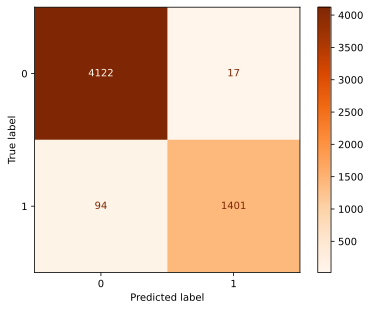

In [59]:
plot_confusion_matrix(model, X_train, y_train, cmap='Oranges')

In [60]:
pd.crosstab(y_train, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Total')

Predicted,0,1,Total
Actual,,,
0,4122,17,4139
1,94,1401,1495
Total,4216,1418,5634


In [61]:
dd=pd.DataFrame({'actual': y_train.values, 'predicted': predicted})
dd

,actual,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
5629,0,0
5630,0,0
5631,0,0
5632,0,0


In [71]:
def pretty_confusion_matrix(cm_array):
    '''
    add labels and grand total to sklearn confusion matrix (2 x 2)
    '''
    df=pd.DataFrame(cm_array, 
                   columns=['No Churn', 'Churn'], 
                   index=['actual_No', 'actual_Churn])
    
    index_labels=df.index.tolist()
    df=df.append(df.sum(axis=0), ignore_index=True)
    df.index=index_labels + ['total']
    df['total']=df.sum(axis=1)
    return df

SyntaxError: EOL while scanning string literal (242429538.py, line 7)

In [72]:
pretty_confusion_matrix(metrics.confusion_matrix(y_train, predicted))

/var/folders/b4/fc6_h3v10ys_mb31vnn11x3m0000gn/T/ipykernel_1344/1869071219.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df.sum(axis=0), ignore_index=True)


,pred_fail,pred_pass,total
actual_fail,4122,17,4139
actual_pass,94,1401,1495
total,4216,1418,5634


In [64]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()

In [65]:
metrics.accuracy_score(y_train, predicted)

0.9802981895633652

In [67]:
metrics.precision_score(y_train, predicted)

0.9880112834978844

In [68]:
metrics.recall_score(y_train, predicted)

0.937123745819398

In [69]:
metrics.f1_score(y_train, predicted)

0.9618949536560246

In [70]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4139
           1       0.99      0.94      0.96      1495

    accuracy                           0.98      5634
   macro avg       0.98      0.97      0.97      5634
weighted avg       0.98      0.98      0.98      5634

